In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime

#Load data from repository folder
states_data = pd.read_csv('COVID19_state.csv')
covid_data = pd.read_csv('us_states_covid19_daily.csv')

In [231]:
#Adding dates and months info to the data sets
covid_data['date_format'] = pd.to_datetime(covid_data['date'], format="%Y%m%d")
covid_data['month'] = pd.DatetimeIndex(covid_data['date_format']).month
months_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
swapped_states = {v: k for k, v in state_dict.items()}
covid_data['month_name'] = covid_data['month'].map(months_dict)
covid_data['state_full'] = covid_data['state'].map(swapped_states)
states_data.rename(columns={'State':'state_full'}, inplace=True)
states_data['state'] = states_data['state_full'].map(state_dict)
covid_data.dropna(subset=['state_full'], inplace=True)
states_data.dropna(subset=['state'], inplace=True)

In [232]:
states_data['%pop_infected'] = states_data['Infected']/states_data['Population']
states_data['%pop_tested'] = states_data['Tested']/states_data['Population']

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

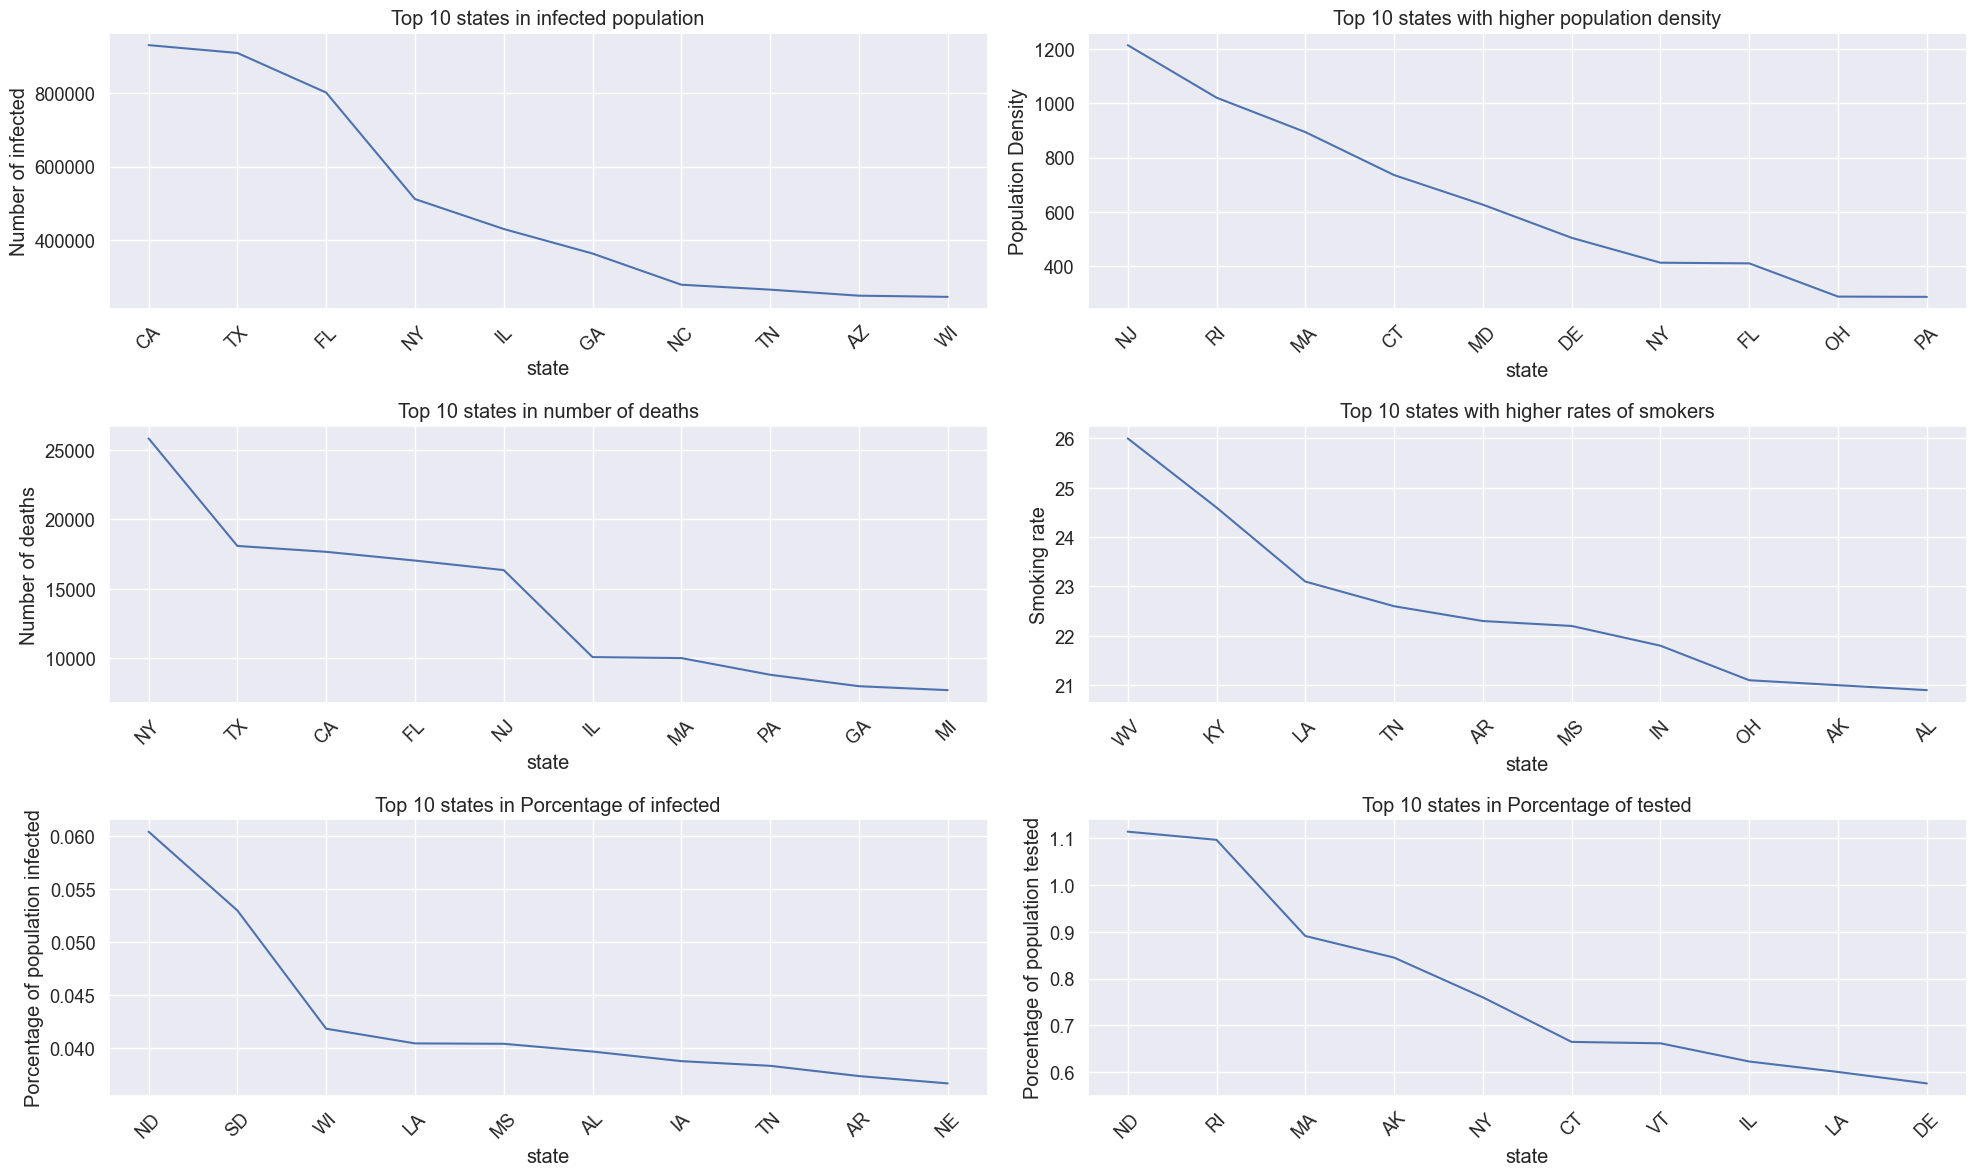

In [233]:
#Getting the top 10 states from different categories
sorted_infected = states_data.sort_values('Infected', ascending=False).head(10)
sorted_density = states_data.sort_values('Pop Density', ascending=False).head(10)
sorted_death = states_data.sort_values('Deaths', ascending=False).head(10)
sorted_smoking = states_data.sort_values('Smoking Rate', ascending=False).head(10)
sorted_porc_inf = states_data.sort_values('%pop_infected', ascending=False).head(10)
sorted_porc_tes = states_data.sort_values('%pop_tested', ascending=False).head(10)

sns.set_theme(font_scale=1.2)
fig, axes = plt.subplots(3, 2, figsize=(20,12))  # 3 row, 2 columns for 6 subplots

# 1st plot Num Infected
sns.lineplot(x='state', y='Infected', data=sorted_infected, ax=axes[0,0])
axes[0,0].set_xlabel('state')
axes[0,0].set_ylabel('Number of infected')
axes[0,0].set_title('Top 10 states in infected population')
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=45)

# 2nd plot Pop Density
sns.lineplot(x='state', y='Pop Density', data=sorted_density, ax=axes[0,1])
axes[0,1].set_xlabel('state')
axes[0,1].set_ylabel('Population Density')
axes[0,1].set_title('Top 10 states with higher population density')
plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45)

# 3rd plot Num Deaths
sns.lineplot(x='state', y='Deaths', data=sorted_death, ax=axes[1,0])
axes[1,0].set_xlabel('state')
axes[1,0].set_ylabel('Number of deaths')
axes[1,0].set_title('Top 10 states in number of deaths')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# 4th plot Rate Smokers
sns.lineplot(x='state', y='Smoking Rate', data=sorted_smoking, ax=axes[1,1])
axes[1,1].set_xlabel('state')
axes[1,1].set_ylabel('Smoking rate')
axes[1,1].set_title('Top 10 states with higher rates of smokers')
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)

# 5th plot
sns.lineplot(x='state', y='%pop_infected', data=sorted_porc_inf, ax=axes[2,0])
axes[2,0].set_xlabel('state')
axes[2,0].set_ylabel('Porcentage of population infected')
axes[2,0].set_title('Top 10 states in Porcentage of infected')
plt.setp(axes[2,0].xaxis.get_majorticklabels(), rotation=45)

# 6th plot
sns.lineplot(x='state', y='%pop_tested', data=sorted_porc_tes, ax=axes[2,1])
axes[2,1].set_xlabel('state')
axes[2,1].set_ylabel('Porcentage of population tested')
axes[2,1].set_title('Top 10 states in Porcentage of tested')
plt.setp(axes[2,1].xaxis.get_majorticklabels(), rotation=45)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

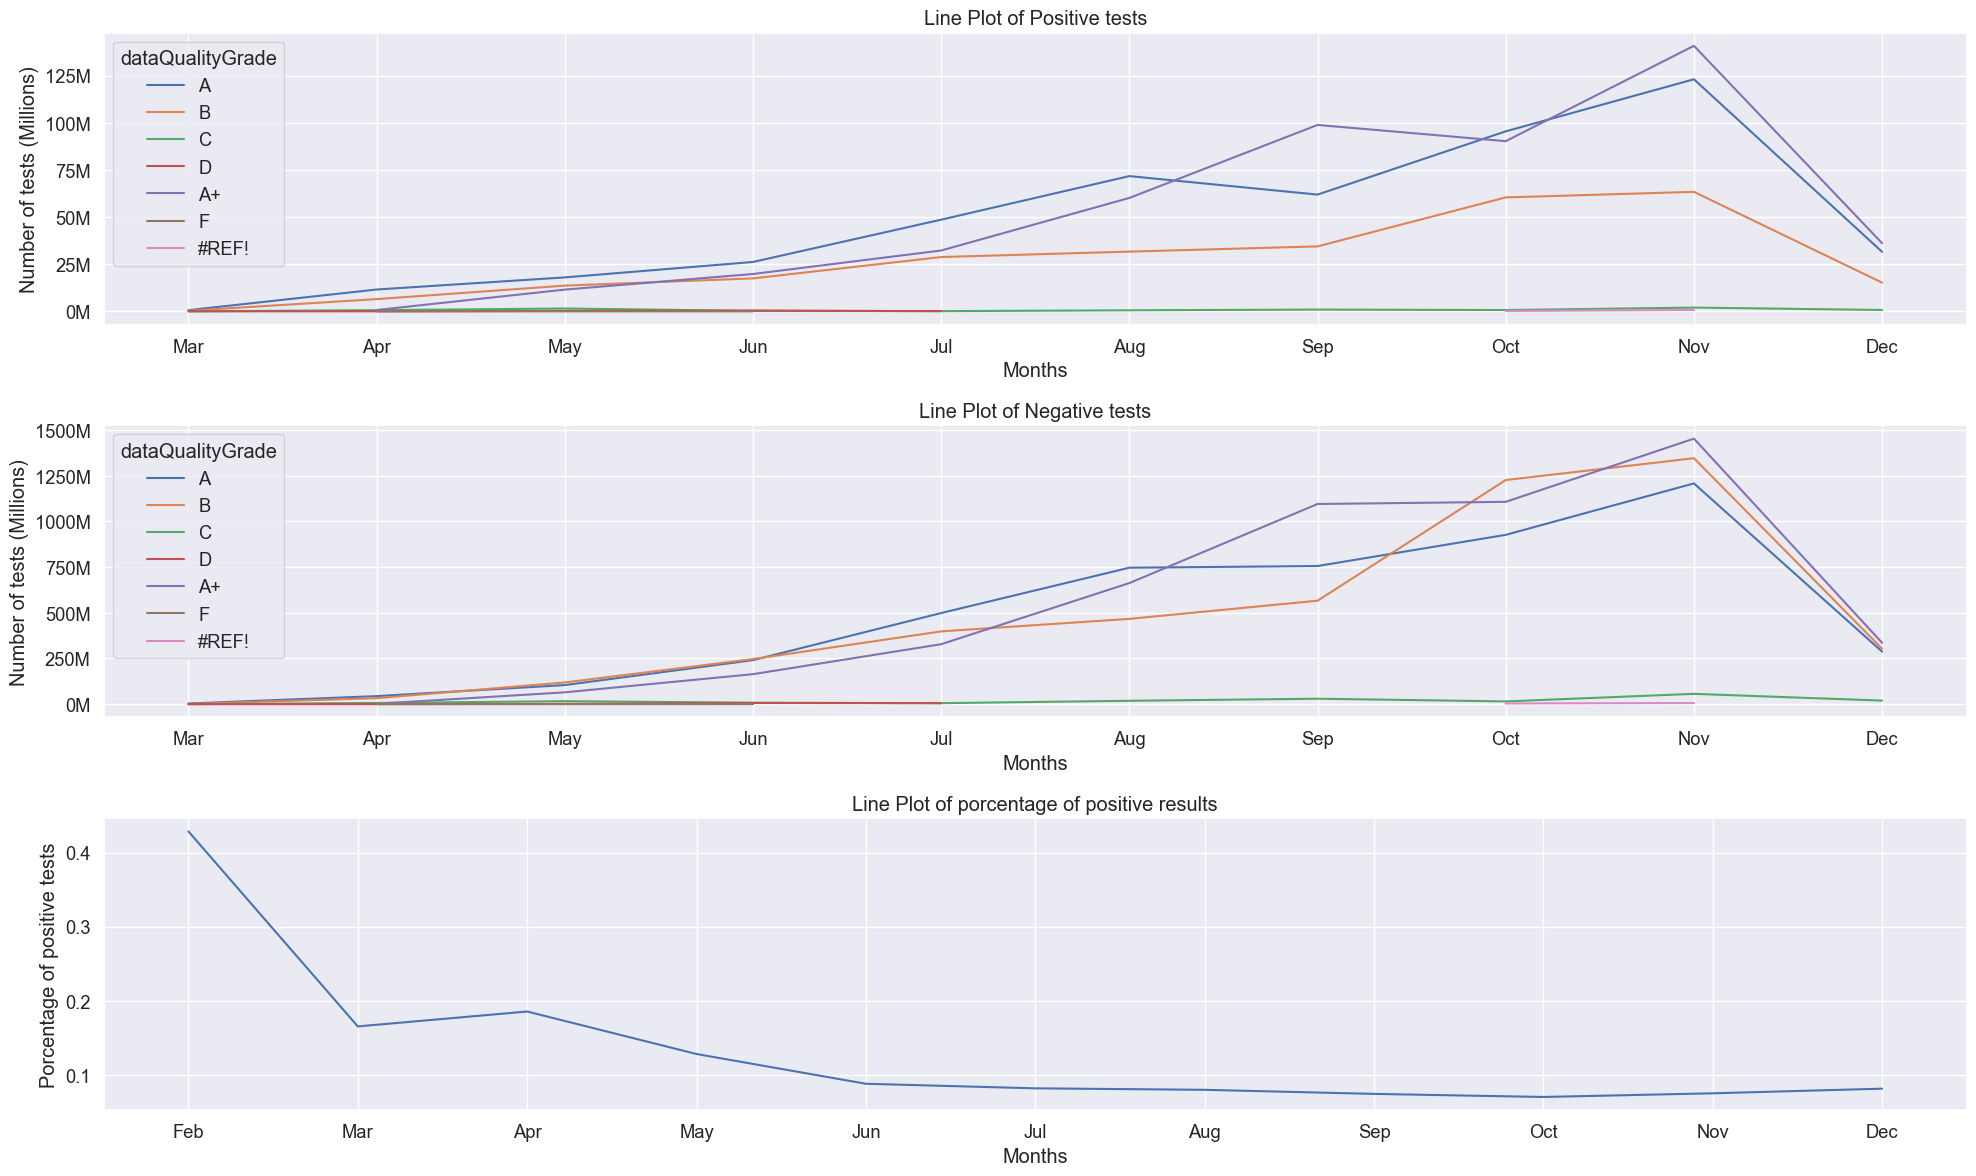

In [234]:
#Group by month and dataQuality
grouped_data1 = covid_data.groupby(by = ['month', 'month_name', 'dataQualityGrade']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum'})
grouped_data2 = covid_data.groupby(['month', 'month_name']).agg({'positive':'sum', 'negative':'sum', 'death':'sum', 'hospitalized':'sum'})
grouped_data2['%Positives_Tests'] = grouped_data2['positive']/(grouped_data2['negative'] + grouped_data2['positive'])

# Create a bar plot of positives and negatives grouped by month
sns.set_theme(font_scale=1.2)
fig, axes = plt.subplots(3, 1, figsize=(20,12))  # 4 row, 1 columns for 6 subplots


sns.lineplot(x='month_name', y='positive', data=grouped_data1, hue='dataQualityGrade', legend=True, ax=axes[0])
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Number of tests (Millions)')
axes[0].set_title('Line Plot of Positive tests')
sns.lineplot(x='month_name', y='negative', data=grouped_data1, hue='dataQualityGrade', legend=True, ax=axes[1])
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Number of tests (Millions)')
axes[1].set_title('Line Plot of Negative tests')
sns.lineplot(x='month_name', y='%Positives_Tests', data=grouped_data2, ax=axes[2])
axes[2].set_xlabel('Months')
axes[2].set_ylabel('Porcentage of positive tests')
axes[2].set_title('Line Plot of porcentage of positive results')

# Create a custom formatter to show units in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [235]:
#Check for correlation between the different columns and the amount of infected
sel_cols = ['Pop Density', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
    'Smoking Rate', 'Health Spending', 'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+']

corr_matrix = states_data[sel_cols + ['Infected']].corr()
corr_matrix

,Pop Density,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Health Spending,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,Infected
Pop Density,1.000000,0.585786,0.443812,-0.010079,-0.454104,-0.341869,0.378493,0.110597,0.519188,-0.373686,0.339734,0.152292,0.138758
Income,0.585786,1.000000,0.886935,-0.122642,0.113816,-0.578860,0.535438,-0.361070,0.459420,-0.321554,0.488891,0.002390,0.103714
GDP,0.443812,0.886935,1.000000,-0.076271,0.181340,-0.519444,0.501020,-0.343662,0.510665,-0.118241,0.527030,-0.197398,0.137826
Unemployment,-0.010079,-0.122642,-0.076271,1.000000,-0.050725,0.435496,0.147367,0.008140,-0.029129,0.021113,0.001858,-0.051017,0.011071
Sex Ratio,-0.454104,0.113816,0.181340,-0.050725,1.000000,-0.124306,0.116936,-0.675553,-0.123240,0.330431,-0.071815,-0.275038,-0.255011
Smoking Rate,-0.341869,-0.578860,-0.519444,0.435496,-0.124306,1.000000,0.051128,0.124497,-0.606205,0.031118,-0.337320,0.196889,-0.202698
Health Spending,0.378493,0.535438,0.501020,0.147367,0.116936,0.051128,1.000000,-0.559658,-0.200392,-0.511958,-0.000621,0.457156,-0.252802
Temperature,0.110597,-0.361070,-0.343662,0.008140,-0.675553,0.124497,-0.559658,1.000000,0.229588,0.076385,-0.016817,-0.058917,0.451652
Urban,0.519188,0.459420,0.510665,-0.029129,-0.123240,-0.606205,-0.200392,0.229588,1.000000,0.093873,0.566447,-0.380231,0.417631
Age 0-25,-0.373686,-0.321554,-0.118241,0.021113,0.330431,0.031118,-0.511958,0.076385,0.093873,1.000000,-0.061816,-0.865008,0.115596


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

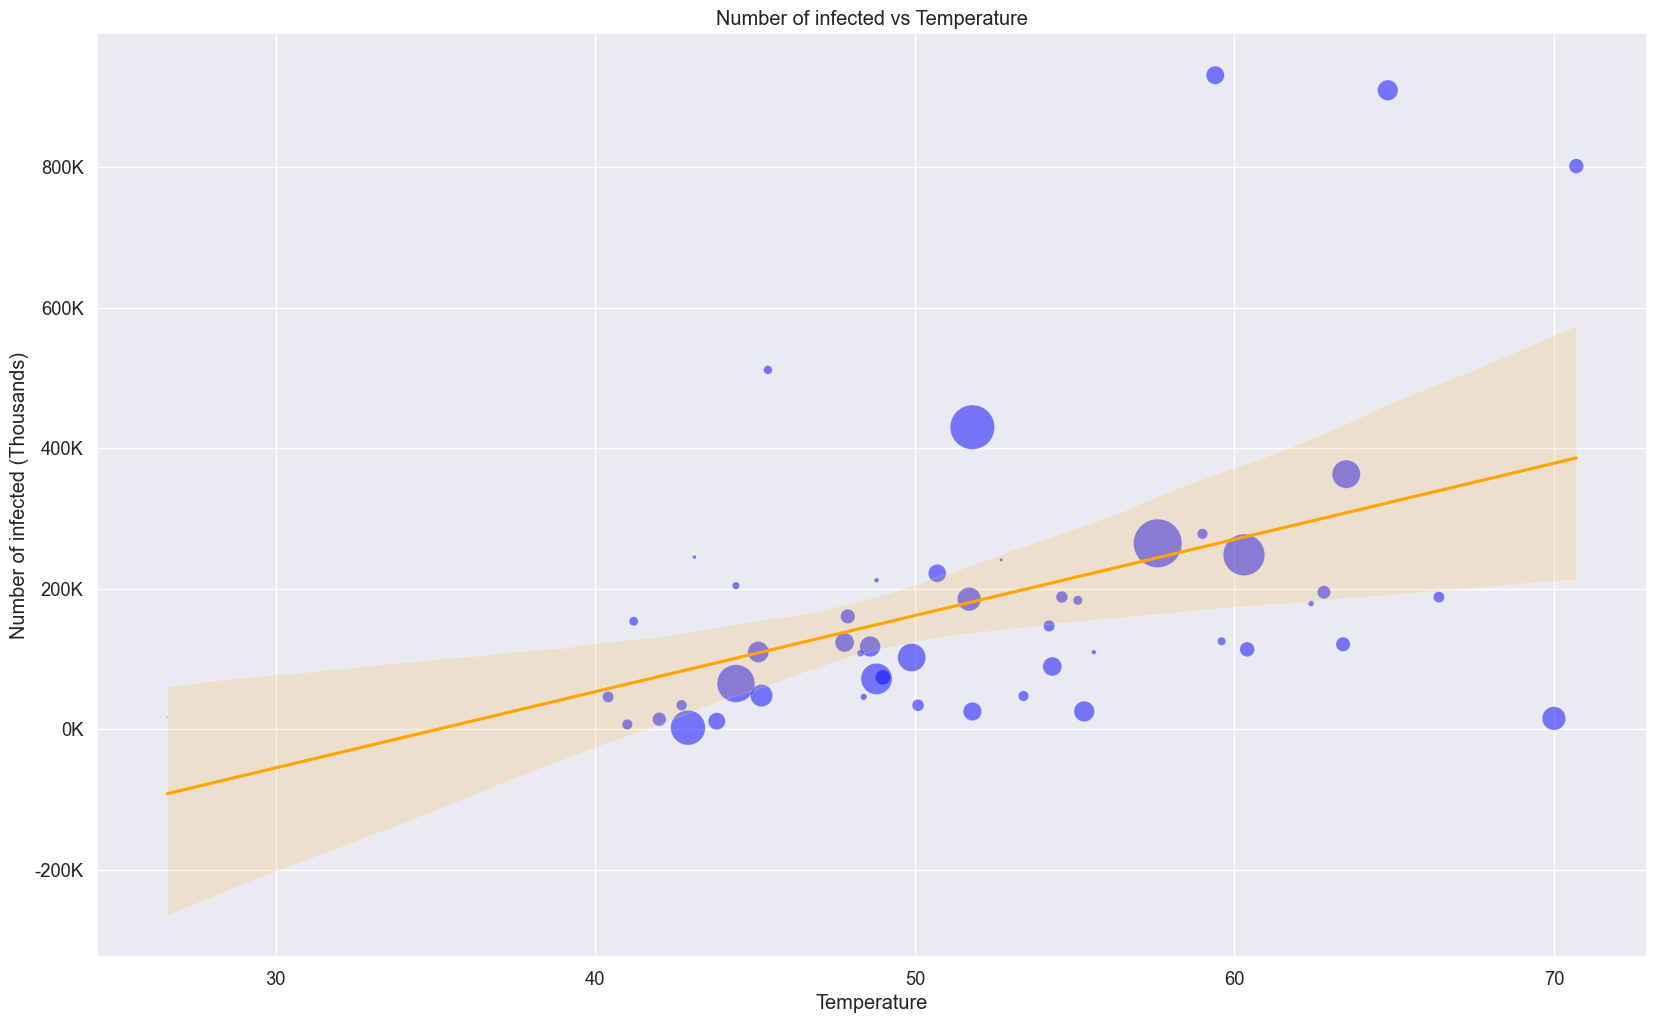

In [236]:
sns.set_theme(font_scale=1.2)
plt.figure(figsize=(20,12))

sns.scatterplot(x='Temperature', y='Infected', data=states_data, size='Pop Density', sizes=states_data['Pop Density'].to_list(), color='Blue', alpha=0.5, legend=False)
sns.regplot(x='Temperature', y='Infected', data=states_data, scatter=False, color='Orange', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Number of infected (Thousands)')
plt.title('Number of infected vs Temperature')

def thousands_formatter(x, pos):
    return f'{x/1e3:.0f}K'

formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [237]:
data_filtered = covid_data[(covid_data['date']==20200401) | (covid_data['date']==20201130)][['state_full', 'date', 
    'positive', 'negative', 'totalTestResults', 'death', 'dataQualityGrade']]

In [238]:
#Compare how much it increased in each state since beginnigs of March until the ends of November
data_pivoted = data_filtered.pivot(index='state_full', columns='date', values=['positive', 'negative', 'totalTestResults', 'death', 'dataQualityGrade'])
data_pivoted.columns = [f'{col[0]}_{col[1]}' for col in data_pivoted.columns]
data_pivoted = data_pivoted.reset_index()

#Create Rate of increase
data_pivoted['Rate_Increase'] = data_pivoted['positive_20201130']/data_pivoted['positive_20200401']

#Show the top 10 worst states in terms of increase rate
worst_ten = data_pivoted[['state_full', 'Rate_Increase','positive_20201130']].sort_values(['Rate_Increase'], ascending=False).head(10)
worst_ten = worst_ten['state_full'].tolist()
data_pivoted[['state_full', 'Rate_Increase','positive_20201130']].sort_values(['Rate_Increase'], ascending=False).head(10)

,state_full,Rate_Increase,positive_20201130
40,South Dakota,623.751938,80464.0
26,Nebraska,602.219048,126466.0
33,North Dakota,570.158273,79252.0
14,Iowa,368.688525,202410.0
22,Minnesota,327.608428,318763.0
15,Kansas,326.651452,157446.0
16,Kentucky,302.945854,179041.0
25,Montana,299.028846,62198.0
42,Texas,292.246935,1168111.0
35,Oklahoma,275.027816,197745.0


In [239]:
#Show the top 10 states in amounts of deaths
worst_ten_deaths = data_pivoted[['state_full', 'death_20201130','positive_20201130']].sort_values(['death_20201130'], ascending=False).head(10)
worst_ten_deaths = worst_ten_deaths['state_full'].tolist()
data_pivoted[['state_full', 'death_20201130','positive_20201130']].sort_values(['death_20201130'], ascending=False).head(10)

,state_full,death_20201130,positive_20201130
31,New York,26747.0,647980.0
42,Texas,21379.0,1168111.0
4,California,19141.0,1212968.0
8,Florida,18834.0,983370.0
29,New Jersey,16993.0,337304.0
12,Illinois,12985.0,726304.0
20,Massachusetts,10748.0,226132.0
37,Pennsylvania,10383.0,361464.0
21,Michigan,9564.0,388942.0
9,Georgia,9452.0,422133.0


In [240]:
#Show the bottom 10 states in terms of rate of increase
best_ten = data_pivoted[['state_full', 'Rate_Increase', 'positive_20201130']].sort_values(['Rate_Increase'], ascending=False).tail(10)
best_ten = best_ten['state_full'].tolist()
data_pivoted[['state_full', 'Rate_Increase', 'positive_20201130']].sort_values(['Rate_Increase'], ascending=False).tail(10)

,state_full,Rate_Increase,positive_20201130
28,New Hampshire,50.587952,20994.0
17,Louisiana,36.179016,232414.0
18,Maine,34.177326,11757.0
6,Connecticut,32.975822,117295.0
20,Massachusetts,29.602304,226132.0
46,Washington,21.989458,162700.0
21,Michigan,19.210807,388942.0
29,New Jersey,15.156324,337304.0
44,Vermont,13.425,4296.0
31,New York,7.740587,647980.0


In [241]:
#Info of the worst 10 states in increase ratio
states_data[states_data['state_full'].isin(worst_ten)][['Population', 'Pop Density', 'Income', 'GDP', 'Unemployment', 'Smoking Rate', 'Hospitals', 'Health Spending', 'Pollution', 'Temperature', 'Urban', 'Age 0-25',
                                                        'Age 26-54', 'Age 55+']]

,Population,Pop Density,Income,GDP,Unemployment,Smoking Rate,Hospitals,Health Spending,Pollution,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
12,3179849,56.9284,48823,59977,2.8,17.1,118,8200,7.1,47.8,64.0,0.34,0.36,0.30
16,2910357,35.5968,50155,56334,3.1,17.4,139,7651,7.0,54.3,74.2,0.35,0.36,0.29
17,4499692,113.9566,41779,46898,4.2,24.6,105,8004,8.1,55.6,58.4,0.33,0.38,0.30
23,5700671,71.5922,56374,64675,3.1,14.5,127,8871,6.6,41.2,73.3,0.32,0.38,0.30
26,1086759,7.4668,47120,46609,3.5,17.2,56,8221,6.6,42.7,55.9,0.31,0.35,0.34
28,761723,11.0393,54306,72597,2.2,18.3,39,9851,4.6,40.4,59.9,0.35,0.37,0.28
29,1952570,25.4161,52110,63942,2.9,15.4,93,8412,7.1,48.8,73.1,0.35,0.37,0.29
36,3954821,57.6547,46128,50613,3.2,20.1,125,7627,8.2,59.6,66.2,0.35,0.37,0.29
41,903027,11.9116,50141,58624,3.3,19.3,57,8933,5.1,45.2,56.7,0.35,0.35,0.30
43,29472295,112.8204,49161,61167,3.5,15.7,523,6998,8.3,64.8,84.7,0.36,0.39,0.24


In [242]:
#Info of the worst 10 states in amount of deaths
states_data[states_data['state_full'].isin(worst_ten_deaths)][['Population', 'Pop Density', 'Income', 'GDP', 'Unemployment', 'Smoking Rate', 'Hospitals', 'Health Spending', 'Pollution', 'Temperature', 'Urban', 'Age 0-25',
                                                        'Age 26-54', 'Age 55+']]

,Population,Pop Density,Income,GDP,Unemployment,Smoking Rate,Hospitals,Health Spending,Pollution,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
4,39937489,256.3727,62586,74205,3.9,11.3,359,7549,12.8,59.4,95.0,0.33,0.40,0.26
9,21992985,410.1256,49417,48318,2.8,16.1,217,8076,7.4,70.7,91.2,0.29,0.37,0.35
10,10736059,186.6719,45745,55832,3.1,17.5,145,6587,8.3,63.5,75.1,0.35,0.39,0.26
14,12659682,228.0243,56933,67268,3.4,15.5,187,8262,9.3,51.8,88.5,0.33,0.38,0.28
19,6976597,894.4355,70073,82480,2.8,13.7,75,10559,6.3,47.9,92.0,0.30,0.39,0.31
22,10045029,177.6655,47582,53209,3.6,19.3,144,8055,8.0,44.4,74.6,0.32,0.37,0.31
31,8936574,1215.1991,67609,69378,3.8,13.7,82,8859,8.1,52.7,94.7,0.31,0.38,0.30
34,19440469,412.5211,68667,85746,3.7,14.1,166,9778,6.6,45.4,87.9,0.31,0.39,0.30
38,12820878,286.5449,55349,61594,4.7,18.7,199,9258,9.2,48.8,78.7,0.30,0.37,0.32
43,29472295,112.8204,49161,61167,3.5,15.7,523,6998,8.3,64.8,84.7,0.36,0.39,0.24


In [243]:
#Info of the best 10 states in increase ratio
states_data[states_data['state_full'].isin(best_ten)][['Population', 'Pop Density', 'Income', 'GDP', 'Unemployment', 'Smoking Rate', 'Hospitals', 'Health Spending', 'Pollution', 'Temperature', 'Urban', 'Age 0-25',
                                                        'Age 26-54', 'Age 55+']]

,Population,Pop Density,Income,GDP,Unemployment,Smoking Rate,Hospitals,Health Spending,Pollution,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
6,3563077,735.8689,74561,76342,3.8,12.7,32,9859,7.2,49.0,88.0,0.30,0.38,0.32
18,4645184,107.5175,45542,53589,5.2,23.1,158,7815,7.9,66.4,73.2,0.34,0.37,0.28
19,6976597,894.4355,70073,82480,2.8,13.7,75,10559,6.3,47.9,92.0,0.30,0.39,0.31
21,1345790,43.6336,48241,47969,3.2,17.3,34,9531,5.9,41.0,38.7,0.26,0.37,0.37
22,10045029,177.6655,47582,53209,3.6,19.3,144,8055,8.0,44.4,74.6,0.32,0.37,0.31
30,1371246,153.1605,61405,63067,2.6,15.7,28,9589,4.4,43.8,60.3,0.28,0.37,0.34
31,8936574,1215.1991,67609,69378,3.8,13.7,82,8859,8.1,52.7,94.7,0.31,0.38,0.30
34,19440469,412.5211,68667,85746,3.7,14.1,166,9778,6.6,45.4,87.9,0.31,0.39,0.30
46,628061,68.1416,53598,53523,2.4,15.8,14,10190,5.1,42.9,38.9,0.27,0.36,0.36
47,7797095,117.3272,60781,74182,3.8,13.5,92,7913,8.0,48.3,84.1,0.31,0.40,0.29
